# Учебный проект "Анализ рынка заведений общественного питания Москвы"

> # Цель проекта:
- Анализ данных по рынку заведений общественного питания Москвы
- Подготовка презентации по результатам исследования


> # Задачи проекта:
- Импортировать библиотеки, необходимые для анализа,
- Прочитать датасет,
- Провести предобработку датасета,
- Провести анализ данных, построить соответствующие графики,
- Сформулировать промежуточные и общие выводы по проекту,
- Подготовить презентацию по результатам исследования.

> # Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='2'>Импорт датасета</a>
- <a id='4'>Предобработка данных</a>
- <a id='19'>Промежуточные выводы по результатам предобработки</a>
- <a id='20'>Cоотношение видов объектов общественного питания по количеству</a>
- <a id='24'>Соотношение сетевых и несетевых заведений общепита в Москве</a>
- <a id='26'>Для какого вида объекта общественного питания характерно сетевое распространение?</a>
- <a id='27'>Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>
- <a id='30'>Среднее количество посадочных мест. Какой тип заведений предоставляет в среднем наибольшее количество посадочных мест?</a>
- <a id='32'>Выделение в отдельный столбец информации об улице из столбца 'address'</a>
- <a id='34'>Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?</a>
- <a id='35'>Импорт внешней библиотеки</a>
- <a id='42'>Улицы с одним объектом общественного питания. В каких районах Москвы расположены данные улицы?</a>
- <a id='44'>Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?</a>
- <a id='44'>Общие выводы</a>
- <a id='44'>Ссылка на презентацию</a>

____

## Импорт и предобработка датасета

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})
import numpy as np
import requests
from io import BytesIO
import warnings

# Заранее избавляемся от возможных предупреждений
warnings.filterwarnings('ignore')

In [2]:
# Импортируем датасет
df = pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/rest_data.csv')

In [3]:
# Выводим результаты
df.sample(10)

,id,object_name,chain,object_type,address,number
4226,27437,ШКОЛА 762,нет,столовая,"город Москва, Норильская улица, дом 4",300
4663,28870,школа 919,нет,буфет,"город Москва, Ставропольская улица, дом 20",240
4815,21319,СТОЛОВАЯ при ООО «Природоведение и школа»,нет,столовая,"город Москва, Пермская улица, дом 11, строение 6",24
4005,147706,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, улица Измайловский Вал, дом 2",178
4814,28314,Столовая ГУП «Мосгортранс»,нет,столовая,"город Москва, улица Матросская Тишина, дом 15/...",72
8298,143839,Ресторан Березка,нет,кафе,"город Москва, Пресненская набережная, дом 8, с...",100
10997,173385,Донеретт,нет,предприятие быстрого обслуживания,"город Москва, Гурьевский проезд, дом 27, корпус 1",0
7004,125026,Папа Джонс,да,кафе,"город Москва, улица Усиевича, дом 22, строение 2",48
2798,29510,Столовая Колледж Сферы Услуг № 10 Подразделени...,нет,столовая,"город Москва, Тимирязевская улица, дом 21",160
5295,26929,Му-Му,да,кафе,"город Москва, улица Пришвина, дом 22",90


In [4]:
# Проверяем наличие дубликатов в датесете
df[df[['object_name','chain','address','number','object_type']].duplicated()].count()

id             82
object_name    82
chain          82
object_type    82
address        82
number         82
dtype: int64

In [5]:
#Избавляемся от дубликатов
df = df[['object_name','chain','address','number','object_type']]\
.drop_duplicates().reset_index(drop = True)

In [6]:
# Используем функцию из предыдущих проектов для вывода info(), проверки дубликатов и NaN
def info (dataframe):
    print (dataframe.info())
    print()
    print ('Количество duplicates:',dataframe.duplicated().sum())
    print()
    print('Количество NaN:')
    print(dataframe.isnull().sum())

In [7]:
# Выводим результат
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284 entries, 0 to 15283
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15284 non-null  object
 1   chain        15284 non-null  object
 2   address      15284 non-null  object
 3   number       15284 non-null  int64 
 4   object_type  15284 non-null  object
dtypes: int64(1), object(4)
memory usage: 597.2+ KB
None

Количество duplicates: 0

Количество NaN:
object_name    0
chain          0
address        0
number         0
object_type    0
dtype: int64


In [8]:
# Выводим типы общепита
np.unique(df[['chain', 'object_type']].values)

array(['бар', 'буфет', 'да', 'закусочная', 'кафе', 'кафетерий',
       'магазин (отдел кулинарии)', 'нет',
       'предприятие быстрого обслуживания', 'ресторан', 'столовая'],
      dtype=object)

In [9]:
# Приводим все к единообразному виду
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()

In [10]:
# Переименовываем столбцы для удобства работы
df = df.rename(columns={'object_name':'name'})
df = df.rename(columns={'chain':'network'})
df = df.rename(columns={'object_type':'object'})
df = df.rename(columns={'number':'seats_num'})

In [11]:
# Выводим результат
df.sample(10)

,name,network,address,seats_num,object
4265,столовая «щи-борщи,нет,"город Москва, Маломосковская улица, дом 10",80,столовая
14260,ipho cafe,нет,"город Москва, Манежная площадь, дом 1, строение 2",50,кафе
11027,печорин александр александрович,нет,"город Москва, улица Сущёвский Вал, дом 5, стро...",5,кафе
11983,теремок,да,"город Москва, Сигнальный проезд, дом 17",24,закусочная
13023,дагестанская лавка,нет,"город Москва, Мытная улица, дом 74",10,кафе
9693,щепка,нет,"город Москва, Усачёва улица, дом 26",7,кафе
6749,строгинская гавань,нет,"город Москва, Строгинский бульвар, дом 21",150,ресторан
4100,столовая «гоу спо политехнический колледж № 31»,нет,"город Москва, Каширское шоссе, дом 64, корпус 1",200,столовая
14351,go кофе,нет,"город Москва, Старопетровский проезд, дом 1, с...",4,кафетерий
1131,бар италия,нет,"город Москва, Трубная улица, дом 26, корпус 1",48,кафе


In [12]:
# Изменяем обозначения в столбцах
df['network'].replace({'да':True,'нет':False},inplace = True)
df['object'] = df['object'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object'] = df['object'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

In [13]:
# Выводим результат
df.sample(10)

,name,network,address,seats_num,object
13721,панда,False,"город Москва, город Московский, Радужная улица...",15,кафе
4225,кафе,False,"город Москва, Сельскохозяйственная улица, дом ...",40,кафе
3849,столовая при гбоу школа 1231,False,"город Москва, улица Пречистенка, дом 12/2, стр...",50,столовая
9205,бургер кинг,True,"город Москва, город Щербинка, Железнодорожная ...",0,фаст-фуд
2937,столовая школа 74,False,"город Москва, улица Пырьева, дом 11",220,столовая
5608,столовая оао узоры,False,"город Москва, Полимерная улица, дом 8",42,столовая
5047,бертан xx11,False,"город Москва, Новосущёвская улица, дом 22, стр...",60,столовая
6715,кафе вкус востока,False,"город Москва, улица Свободы, дом 35, строение 40",35,кафе
2421,столовая «гбоу школа №718»,False,"город Москва, город Зеленоград, корпус 1214",160,столовая
12864,лён-гречка,False,"город Москва, проспект 60-летия Октября, дом 10А",12,кулинария


In [14]:
# Формируем словарь по типам объектов общепита
# Формируем массив на основе словаря
object_type_dict = df['object'].unique()
add_to_dict = np.array(['«','»','-','ресторан японской кухни','японский ресторан',
                        'кофейня','кафе-закусочная','ресторан быстрого питания',
                        'семейное кафе и кондитерская','кафе мороженного',
                        'семейное кафе','закусочная','пиццерия','кальянная',
                        'предприятие быстрого питания','кальян-бар',
                        'анти-кафе кальянная','японский ресторан'])
object_type_dict = np.append(object_type_dict,add_to_dict)
object_type_dict

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария', '«', '»', '-',
       'ресторан японской кухни', 'японский ресторан', 'кофейня',
       'кафе-закусочная', 'ресторан быстрого питания',
       'семейное кафе и кондитерская', 'кафе мороженного',
       'семейное кафе', 'закусочная', 'пиццерия', 'кальянная',
       'предприятие быстрого питания', 'кальян-бар',
       'анти-кафе кальянная', 'японский ресторан'], dtype=object)

In [15]:
# Создаем функцию для очистки названий заведений общепита от лишних знаков для дальнейшей работы с названиями
def clear(text):
    global object_type_dict
    for i in object_type_dict:
        while i in text:
            text = text.replace(i,'')
    return text.strip()

In [16]:
# Применяем функцию
df['clear_name'] = df['name'].apply(clear)

In [17]:
# Выводим результат по срезу методом .query()
df.query('network == True')['clear_name'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'муму', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'академия', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'сабвей', 'якитория', 'советские времена', 'андерсон', 'subway',
       'суши сет', 'шоколад', 'тирольские пироги', 'гамбринус',
       'пицца фабрика', 'сити пицца', 'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'магнолия',
       'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гинонотаки', 'тратория semplice', 'ньокки', 'хижина',
       'додо пицца', 'крошка картошка', 'бургер кинг', 'папа джонс',
       'кондитерская волконский', 'две палочки', 'джон д

In [18]:
# Оцениваем количество безымянных заведений общепита
df.query('clear_name == ""').count()

name          832
network       832
address       832
seats_num     832
object        832
clear_name    832
dtype: int64

In [19]:
# Методом drop избавляемся от безымянных заведений (их число составляет порядка 5% от общего числа заведений)
df = df.query('clear_name != ""').reset_index(drop=True)
df.sample(10)

,name,network,address,seats_num,object,clear_name
6227,му-му,True,"город Москва, Осенний бульвар, дом 7, корпус 1",150,кафе,муму
246,при школе 1294,False,"город Москва, Глебовская улица, дом 10",240,столовая,при школе 1294
11963,sapiens,False,"город Москва, Пушечная улица, дом 4, строение 1",40,бар,sapiens
7556,my place,False,"город Москва, улица Щепкина, дом 42, строение 2А",65,кафе,my place
648,кафе «салсабил»,False,"город Москва, улица Менжинского, дом 3",32,кафе,салсабил
10116,кальян бар «garage lounge»,False,"город Москва, Малый Златоустинский переулок, д...",10,кафе,кальян garage lounge
4963,кафе при бассейне,False,"город Москва, Заповедная улица, дом 1",9,кафе,при бассейне
699,кобзарь,False,"город Москва, улица Михайлова, дом 29, корпус 3",45,кафе,кобзарь
1173,домино'с пицца,True,"город Москва, улица Дмитрия Ульянова, дом 12, ...",12,кафе,домино'с пицца
9472,"фудмаркет. коноплина е.а,",False,"город Москва, улица Новый Арбат, дом 21",0,кафе,"фудмаркет. коноплина е.а,"


### Промежуточные выводы:
- Датасет импортирован.
- Дубликаты удалены, пропуски отсутствуют.
- Данные приведены к единообразию.
- Изменены названия столбцов.
- Названия заведений общепита "очищены" от лишних знаков и символов.
- Удалены безымянные заведения.

____

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

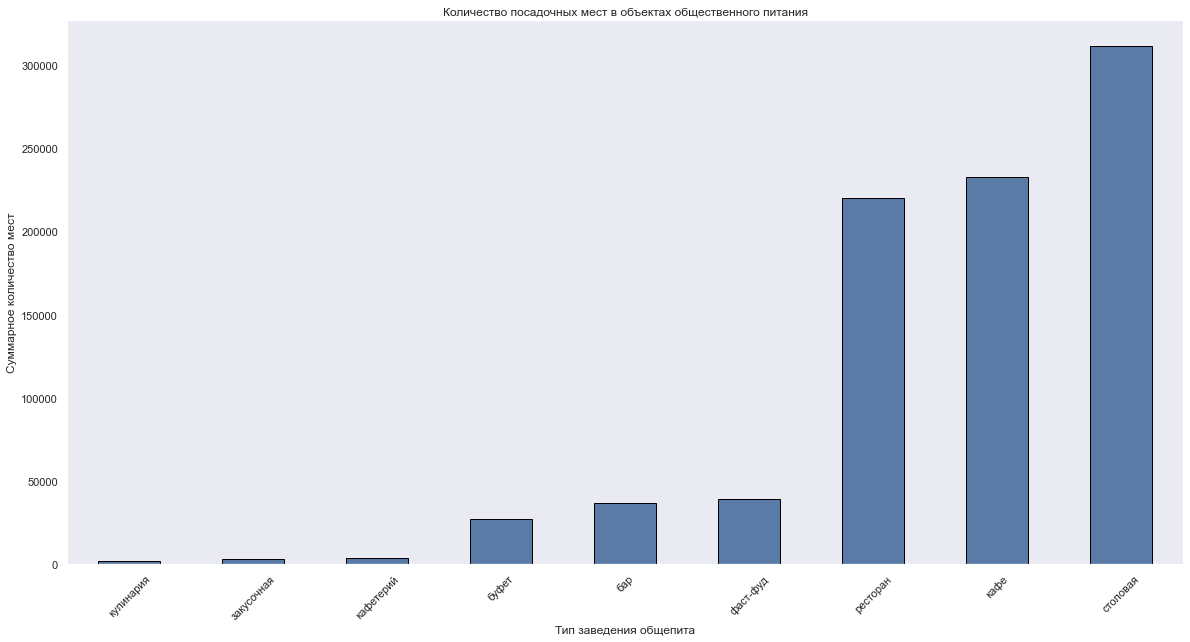

In [20]:
# Формируем график по суммарному количеству посадочных мест
ratio_1 = df.groupby('object').sum().reset_index()
ax = ratio_1[['object', 'seats_num']].set_index('object').sort_values('seats_num', ascending=True)\
.plot(kind='bar', legend=False, color='#5a7ba5', ec='black', grid=False)
ax.set_xlabel('Тип заведения общепита')
ax.set_ylabel('Суммарное количество мест')
ax.set_title('Количество посадочных мест в объектах общественного питания')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Обобщаем результаты в таблице
ratio_1[['object', 'seats_num']].sort_values(by='seats_num')

,object,seats_num
5,кулинария,1457
2,закусочная,2676
4,кафетерий,3477
1,буфет,27163
0,бар,36547
8,фаст-фуд,39227
6,ресторан,220048
3,кафе,232928
7,столовая,311530


### Промежуточные выводы:
- Суммарно, наибольшее количество мест (311530) в столовых - самом демократичном варианте городского общепита.
- Кулинарии обладают наименьшим количеством посадочных мест (1457): свободной площади под столики в магазинах, как правило либо нет совсем, либо ее очень мало.



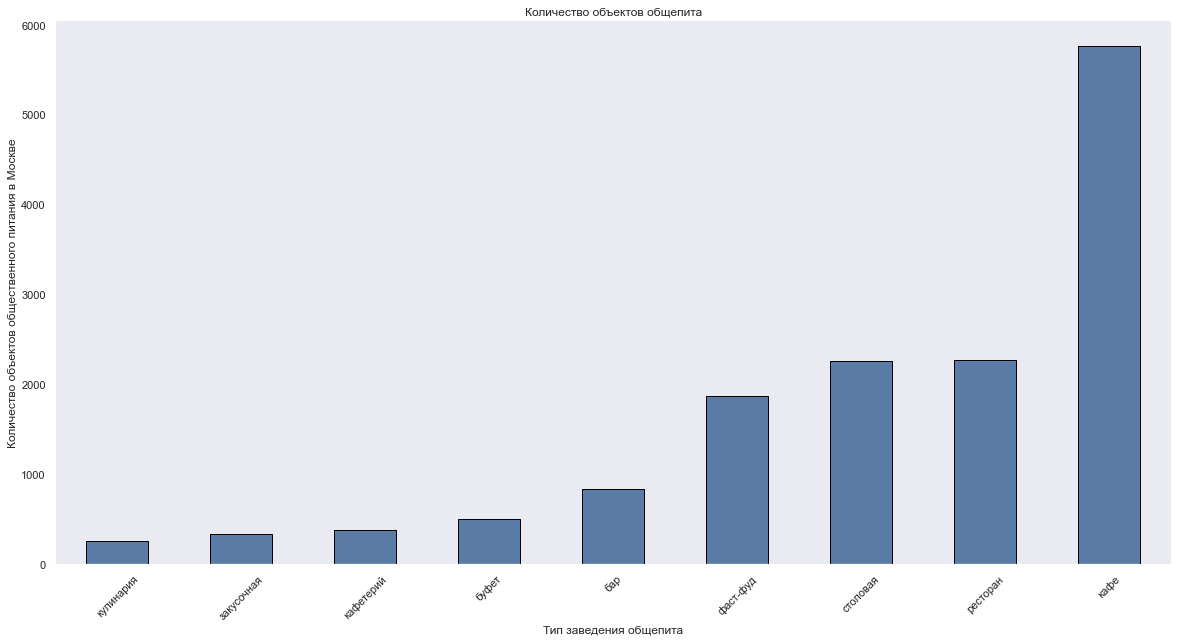

In [22]:
# Формируем график по количеству заведений в каждом типе
ratio_2 = df.groupby('object').count().reset_index()
ax = ratio_2[['object', 'seats_num']].set_index('object').sort_values('seats_num', ascending=True)\
.plot(kind='bar',legend=False, color='#5a7ba5', ec='black', grid=False)
ax.set_xlabel('Тип заведения общепита')
ax.set_ylabel('Количество объектов общественного питания в Москве')
ax.set_title('Количество объектов общепита')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Обобщаем результаты в таблице
df.groupby('object')['name'].count().sort_values()

object
кулинария      256
закусочная     336
кафетерий      379
буфет          497
бар            828
фаст-фуд      1869
столовая      2259
ресторан      2267
кафе          5761
Name: name, dtype: int64

### Промежуточные выводы:
- Кулинарии - самый малочисленный тип заведений общепита в Москве.
- Несмотря на то, что по числу посадочных мест московские кафе уступают столичным столовым, количество кафе (5761) более, чем в два раза превышает количество столовых (2259).

___

### Соотношение сетевых и несетевых заведений общепита в Москве

In [24]:
# Выводим общее количество сетевых и несетевых заведений
df.groupby('network')['name'].count().sort_values()

network
True      2964
False    11488
Name: name, dtype: int64

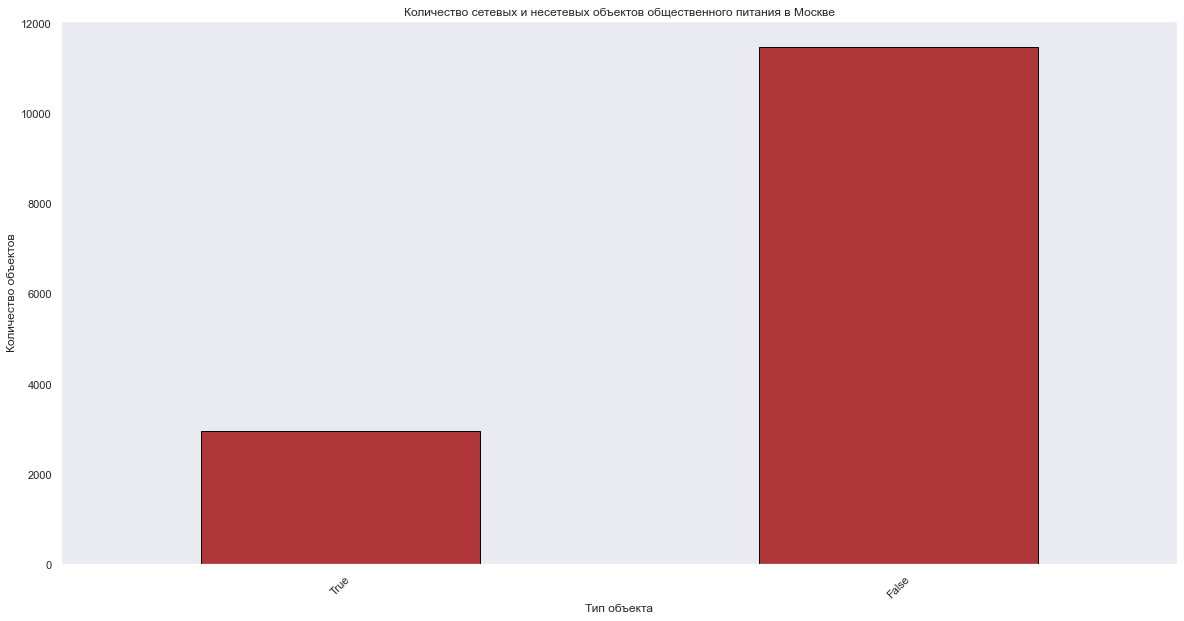

In [25]:
# Формируем график соотношения
ax = df.groupby('network')['name'].count().sort_values()\
.plot(kind='bar',legend=False, color='#af3638', ec='black', grid=False)
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Количество сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

### Промежуточные выводы:
- Независимо от того, хорошо это или плохо, несетевых заведений в столице практически в четыре раза больше, чем сетевых.

___

### Для какого вида объекта общественного питания характерно сетевое распространение?

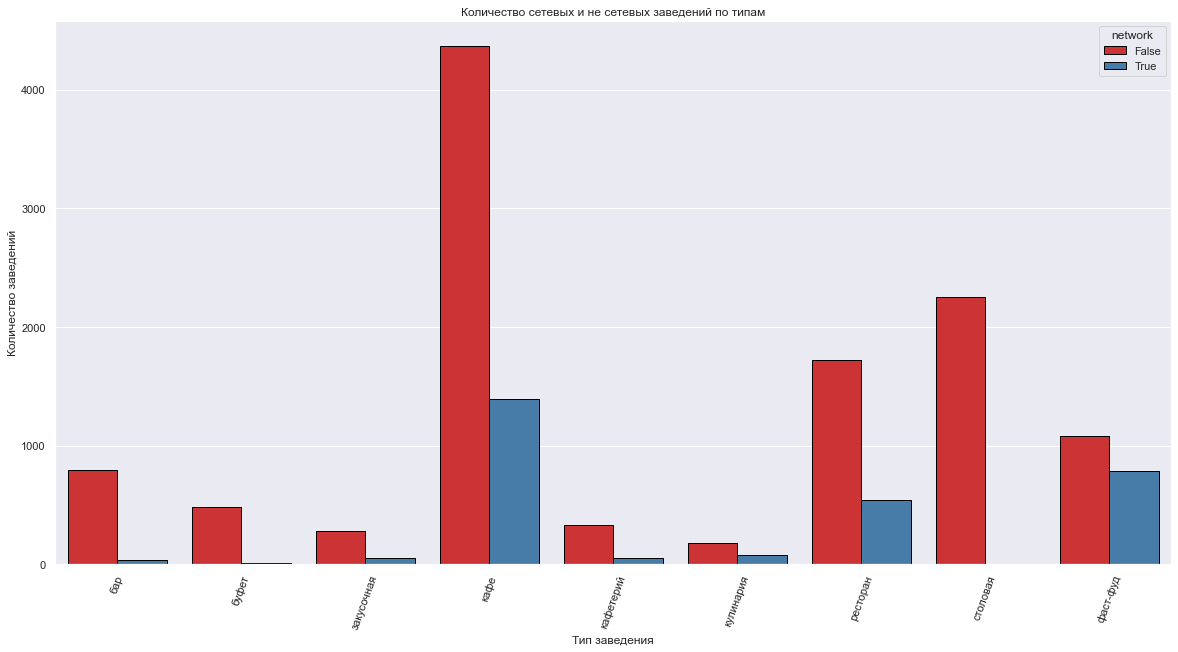

In [26]:
# Формируем датасет по искомым данных методом groupby()
# Выводим barplot
network_type = df.groupby(['object','network'],as_index=False).name.count()
ax=sns.barplot(data=network_type,x='object',y='name',hue='network', palette='Set1', ec='black')
ax.set_title('Количество сетевых и не сетевых заведений по типам')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=70)
plt.show()

### Промежуточные выводы:
- Сетевое распространение характерно для всех типов объектов общепита в Москве, исключая столовые.
- Как на странно, есть мизерное количество сетевых буфетов.
- Довольно много сетевых кафе (около 1400) и сетевых точек фаст-фуда (порядка 800).

___

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

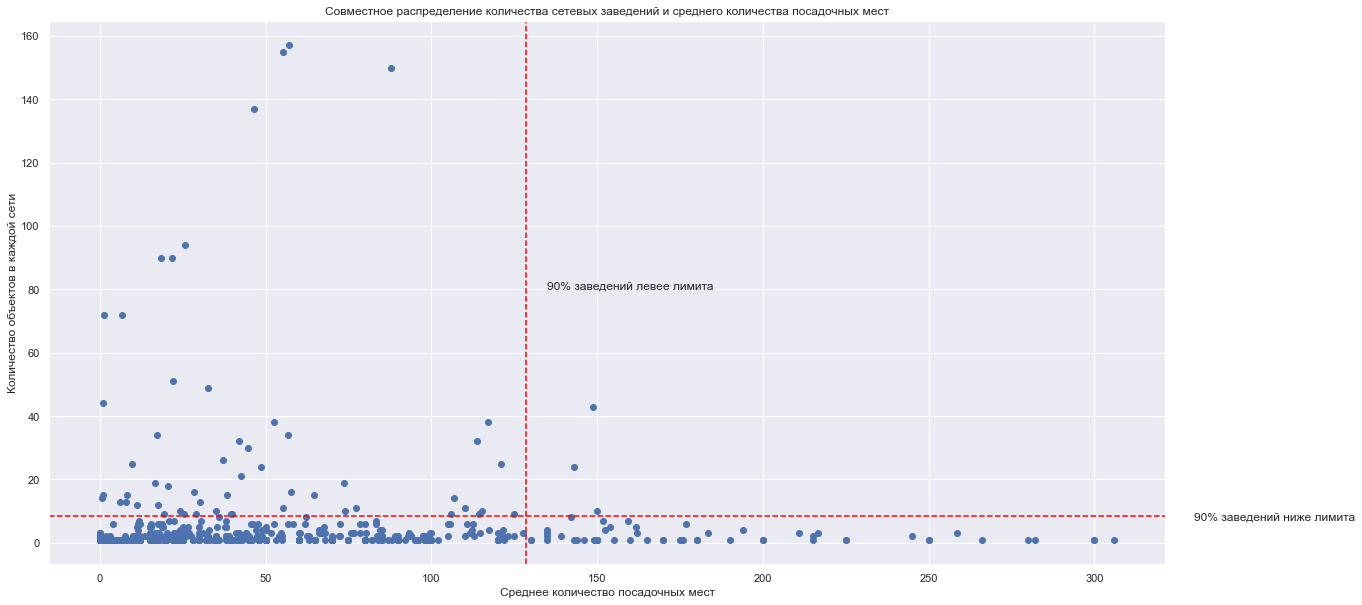

In [27]:
# Проводим группировку датасета по искомым значениям
network_objects = df[df['network']==True].groupby('name').agg({'name':'count', 'seats_num':'mean'})
network_objects.columns = ['objects', 'mean_number']
# Выводим scatterplot с линиями лимита 90%
plt.scatter(network_objects['mean_number'], network_objects['objects'])
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Количество объектов в каждой сети')
plt.title('Совместное распределение количества сетевых заведений и среднего количества посадочных мест')
plt.axhline(np.percentile(network_objects['objects'], 90), linestyle='--', color='red')
plt.axvline(np.percentile(network_objects['mean_number'], 90), linestyle='--', color='red')
plt.text(330,7, '90% заведений ниже лимита')
plt.text(135,80, '90% заведений левее лимита')
plt.show()

In [28]:
# Оцениваем величины 95-го перцентиля, среднего и медианного значений во всем исходном датасете по параметру
all_grouped = df.groupby('clear_name').agg({'network':'count','seats_num':'mean'})
print('95% процентиль:', np.percentile(all_grouped['seats_num'],95))
print('Cреднее значение', all_grouped['seats_num'].mean())
print('Медианое значение:', all_grouped['seats_num'].median())

95% процентиль: 240.0
Cреднее значение 66.7592457067259
Медианое значение: 43.0


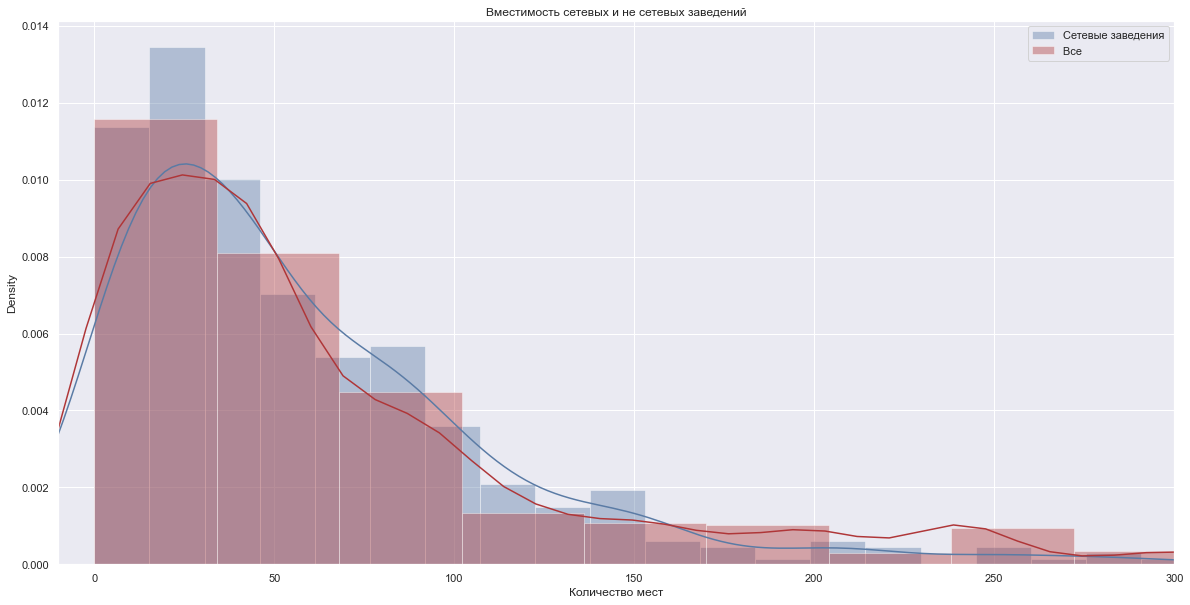

In [29]:
# Формируем и выводим обобщенную гистограмму по сетевым заведениям и всем типам заведений
network_only = df.query('network == True')
network_only_grouped = network_only.groupby('clear_name').agg({'network':'count','seats_num':'mean'})
fig1, fig2 = plt.subplots(figsize=(20,10))
fig1 = sns.distplot(network_only_grouped['seats_num'],label = 'Сетевые заведения', color='#5a7ba5')
fig2 = sns.distplot(all_grouped['seats_num'],label = 'Все ', color='#af3638')
fig1, fig2 = plt.xlim(-10, 300)
plt.title('Вместимость сетевых и не сетевых заведений')
plt.xlabel('Количество мест')
plt.legend()
plt.show()

### Промежуточные выводы:
- Для подавляющего большинства как сетевых, так и несетевых заведений характерно небольшое количество посадочных мест.
- Средняя величина по всей выборке - 67 мест.
- Медианное значение по всей выборке - 43 места.
- Для сетевых заведений типично количество посадочных мест в районе 40 - 50.

____

### Среднее количество посадочных мест. Какой тип заведений предоставляет в среднем наибольшее количество посадочных мест?

In [30]:
# Группируем исходный датасет. Выводим описательные статистики. Сортируем по Q2.
df.groupby('object')['seats_num'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object,,,,,,,,
закусочная,336.0,7.964286,17.028122,0.0,0.0,0.0,10.0,216.0
кулинария,256.0,5.691406,10.014621,0.0,0.0,0.0,8.0,50.0
кафетерий,379.0,9.174142,14.857213,0.0,0.0,6.0,12.0,200.0
фаст-фуд,1869.0,20.988229,38.795915,0.0,0.0,6.0,25.0,580.0
кафе,5761.0,40.431869,38.273934,0.0,15.0,32.0,50.0,533.0
бар,828.0,44.138889,67.853504,0.0,20.0,35.0,50.0,1700.0
буфет,497.0,54.653924,58.410196,0.0,15.0,35.0,80.0,320.0
ресторан,2267.0,97.065726,94.949504,0.0,47.0,80.0,114.0,1500.0
столовая,2259.0,137.906153,91.811785,0.0,60.0,120.0,200.0,1288.0


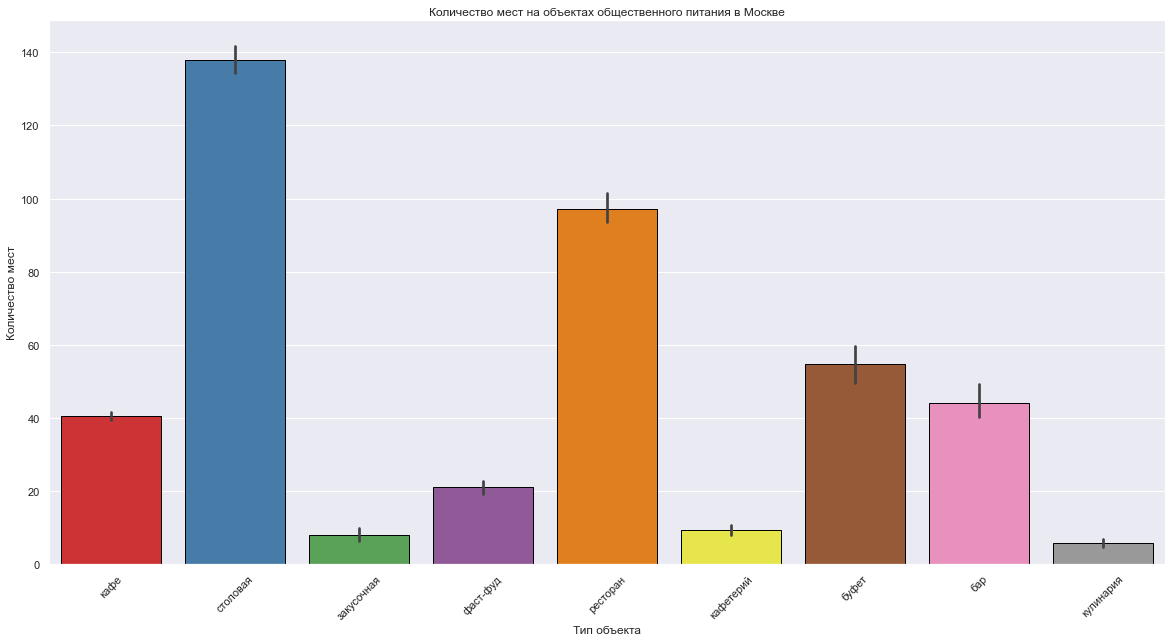

In [31]:
# Проиллюстрируем полученные данные при помощи barplot
ax = sns.barplot(x='object', y='seats_num', data=df, ec='black', palette="Set1")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Количество мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

### Промежуточные выводы:
- В среднем (по всем типам сетевых и несетевых заведений общепита) наибольшее количество посадочных мест предоставляют столовые (порядка 140 мест).
- После столовых идут рестораны (около ста мест).
- Наименьшее количество посадочных мест предоставляют закусочные и кулинарии (в районе десяти посадочных мест).

___

### Выделение в отдельный столбец информации об улице из столбца 'address'

In [32]:
# Для фильтрации информации используем регулярные выражения
regex = "(^[-\w ]+шоссе|^проезд[-\w ]+|^[-\w ]+улица|[-\w ]+улица|улица[-\w ]+|[-\w ]+набережная|деревня[-\w ]+|\
[-\w ]+переулок|[-\w ]+тупик|[-\w ]+шоссе|[-\w ]+площадь|поселение[-\w ]+|площадь[-\w ]+|проспект[-\w ]+|[-\w ]+бульвар|\
[-\w ]+проезд|[-\w ]+проспект|бульвар[-\w ]+|город Зеленоград|[-\w ]+проезд|[-\w ]+аллея|шоссе[-\w ]+|\
аллея[-\w ]+|микрорайон[-\w ]+|переулок[-\w ]+|проезд[-\w ]+|[0-9]-й квартал[-\w ]+|[0-9]-й микрорайон?[-\w ]+),"
df['new_address'] = df['address'].str.extract(pat=regex)[0]

# Выводим результат
print('Нераспознанных строк:', df['new_address'].isna().sum())

Нераспознанных строк: 93


In [33]:
# Удаляем нераспознанные строки
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

# Формируем новый столбец
# Удаляем лишние пробелы между словами
df['new_address'] = df['new_address'].apply(lambda x: x.strip())
df.sample(20)

,name,network,address,seats_num,object,clear_name,new_address
718,ресторан «тануки»,True,"город Москва, Мосфильмовская улица, дом 22",70,ресторан,тануки,Мосфильмовская улица
8393,рыба моя,False,"город Москва, 1-я Тверская-Ямская улица, дом 21",120,кафе,рыба моя,1-я Тверская-Ямская улица
8025,гринклаб,False,"город Москва, поселение Михайлово-Ярцевское, п...",46,ресторан,гринклаб,поселение Михайлово-Ярцевское
7715,хинкальная,True,"город Москва, улица Земляной Вал, дом 7, строе...",42,кафе,хинкальная,улица Земляной Вал
1760,кафе «берёзка»,False,"город Москва, микрорайон Северное Чертаново, д...",47,кафе,берёзка,микрорайон Северное Чертаново
13878,cinnabon,False,"город Москва, Кутузовский проспект, дом 57",30,кафе,cinnabon,Кутузовский проспект
2064,магазин-кулинария «добрый свет»,False,"город Москва, улица Орджоникидзе, дом 15",50,кулинария,магазин добрый свет,улица Орджоникидзе
1893,арт-кальянная shishasity,False,"город Москва, Колокольников переулок, дом 22, ...",30,бар,арт shishasity,Колокольников переулок
8930,"tocador, buffalos",False,"город Москва, Рождественский бульвар, дом 1",0,кафе,"tocador, buffalos",Рождественский бульвар
11901,суши весла,False,"город Москва, Голубинская улица, дом 5, корпус 1",2,кулинария,суши весла,Голубинская улица


### Промежуточные выводы:
- Информация об улицах выделена в отдельный столбец.
- Встречаются улицы за пределами МКАД, в городах-спутниках, городских поселениях и т.п. в пределах "Новой Москвы". Считаю, что указание на то, что та или иная улица находится за пределами МКАД, необходимо оставлять в исследовании по причине того, что во-первых, в разных населенных пунктах могут встречаться улицы с одинаковым названием, во-вторых, указание на нахождение улицы в населенных пунктах за пределами МКАД может повлиять на принятие бизнес-решений.

___

### Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?

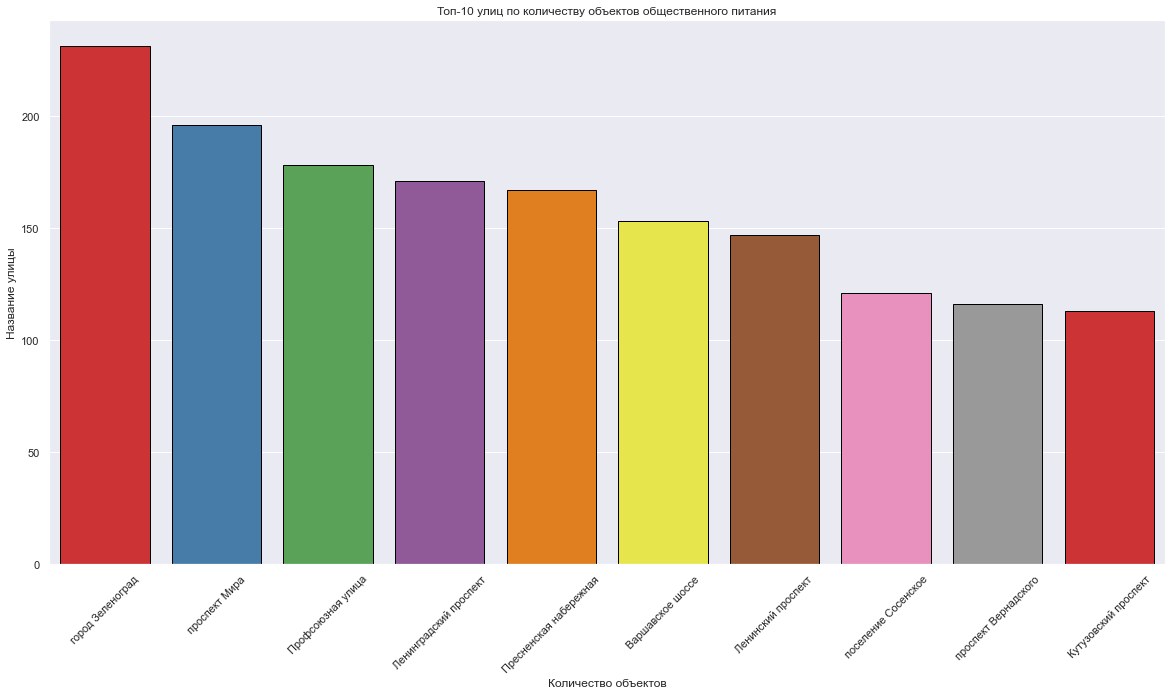

In [34]:
# Выводим barplot
top_streets = df.groupby('new_address', as_index=False).clear_name.count()\
.sort_values(by='clear_name',ascending=False).head(10)
ax = sns.barplot(x='new_address', y='clear_name', data=top_streets,ec='black', palette='Set1')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

<b><span style=color:red> Для дальнейшего анализа данных необходимо подгрузить внешнюю библиотеку адресов. Воспользуемся базой данных улиц mosgaz-streets.</span></b>

In [35]:
# Формируем ключ id
spreadsheet_id='1MDrJQEyhSLtkOzibLWx63Fz1UAgJLDmkwfY0N-U1bJ8'

In [36]:
# Выводим запрос на чтение ссылки
file_name='https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

In [37]:
# Создаем новую переменную
r = requests.get(file_name)

In [38]:
# Создаем и читаем новый датасет
df_1 = pd.read_csv(BytesIO(r.content))

In [39]:
# Выводим результат
df_1.sample(10)

,streetname,areaid,okrug,area
328,улица Чаянова,19,ЦАО,Тверской район
888,Электродная улица,32,ВАО,Район Перово
2261,Ижорская улица,61,САО,Район Западное Дегунино
1996,3-я Магистральная улица,69,САО,Хорошевский район
1000,Медовый переулок,36,ВАО,Район Соколиная Гора
2241,Дегунинский проезд,58,САО,Район Восточное Дегунино
1324,улица Коцюбинского,40,ЗАО,Район Кунцево
2728,улица Берзарина,92,СЗАО,Район Хорошево-Мневники
3135,2-я Покровская улица,110,ЮАО,Район Чертаново Южное
3718,Проектируемый проезд N 5112,118,ЮВАО,Район Печатники


In [40]:
# Формируем общий датасет
top10_streets = top_streets.merge(df_1, left_on = 'new_address',right_on = 'streetname')[['new_address','clear_name','area','okrug']]

In [41]:
# Группируем по убыванию
# Выводим результат
new_top_streets = top10_streets.groupby('new_address',as_index=False).agg({'clear_name':'first','area':'first','okrug':'first'}).sort_values(by='clear_name',ascending=False)
new_top_streets.head(10)

,new_address,clear_name,area,okrug
6,город Зеленоград,231,Район Крюково,Зеленоград
8,проспект Мира,196,Алексеевский район,СВАО
5,Профсоюзная улица,178,Академический район,ЮЗАО
2,Ленинградский проспект,171,Район Аэропорт,САО
4,Пресненская набережная,167,Пресненский район,ЦАО
0,Варшавское шоссе,153,Район Чертаново Центральное,ЮАО
3,Ленинский проспект,147,Район Проспект Вернадского,ЗАО
7,проспект Вернадского,116,Район Проспект Вернадского,ЗАО
1,Кутузовский проспект,113,Район Дорогомилово,ЗАО


### Промежуточные выводы:
- Наибольшее количество объектов общепита расположено в Зеленограде (район "Крюково"). Является ли район "Крюково" в городе Зеленоград "гастро-меккой" - предмет отдельного исследования.
- Из московских улиц лидером по количеству заведений общепита является проспект Мира.
- Замыкает топ-10 улиц с максимальным количеством заведений общественного питания Кутузовский проспект.

___

### Улицы с одним объектом общественного питания. В каких районах Москвы расположены данные улицы?

In [42]:
# Формируем датасет по искомому параметру методом .query
# Формируем обощенный датасет с присоединением внешних данных
one_only = df.groupby('new_address', as_index=False).clear_name.count().query('clear_name == 1')
one_only = one_only.merge(df_1, left_on='new_address',right_on='streetname')

In [43]:
# Создаем новый датасет на основе полученного среза
# Выводим список районов с указаением количества улиц с одним заведением общепита
one_only_streets = one_only.groupby('new_address',as_index=False).agg({'area':'first'})[['new_address','area']]
areas = one_only_streets.groupby('area',as_index=False).agg({'new_address':'count'})
areas.sort_values(by='new_address',ascending=False).head(10)

,area,new_address
91,Таганский район,26
3,Басманный район,24
18,Пресненский район,21
76,Район Хамовники,21
92,Тверской район,20
19,Район Арбат,14
13,Мещанский район,12
43,Район Лефортово,12
30,Район Замоскворечье,11
85,Район Южное Бутово,10


### Промежуточные выводы:
- В Таганском районе столицы есть 26 улиц, на которых расположено лишь одно заведение общепита.
- В районе "Южное Бутово" - десять улиц с единственным заведением общественного питания.
- По всей видимости, это совсем небольшие по протяженности улицы, весьма характерные именно для старой Москвы; зачастую это может быть даже не улица, а переулок или тупик.

___

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

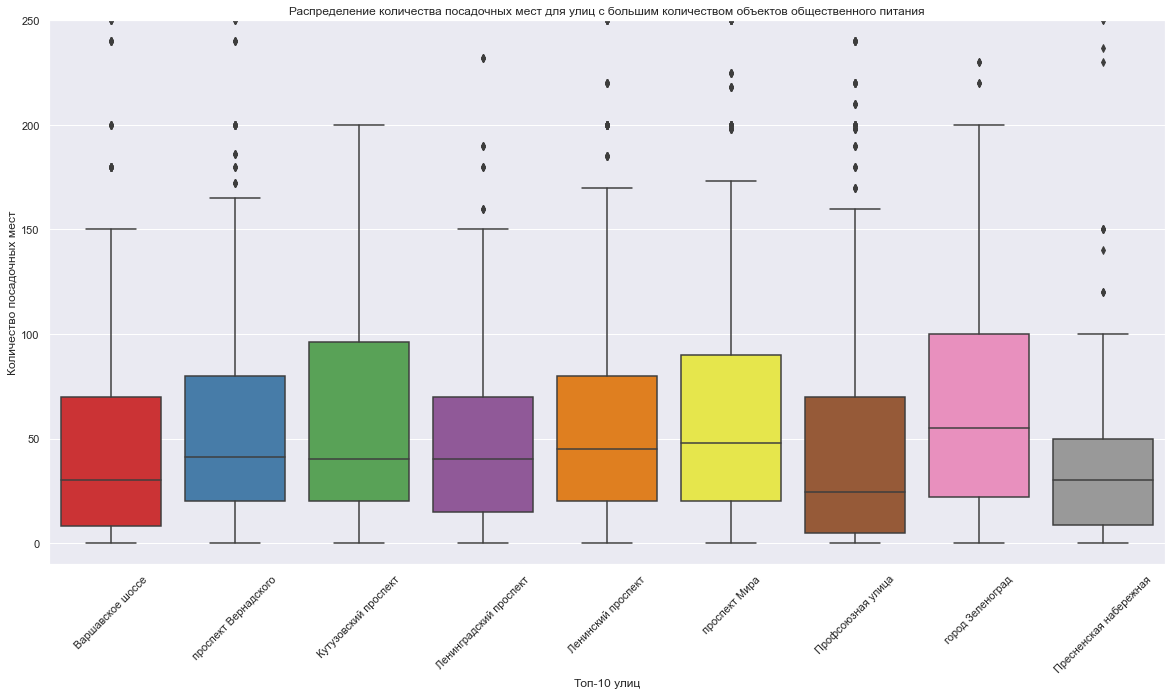

In [44]:
# Формируем массив
# Передаем массив для среза методом .query()
# Создаем новый датасет методом .merge()
# Выводим boxplot
top_street_array = np.array(top10_streets.reset_index()['new_address'])
top_streets_seats = df.query('new_address in @top_street_array').reset_index()
top_streets_seats = top_streets_seats.merge(top10_streets, how='left', on = 'new_address')
sns.boxplot(data = top_streets_seats,x='new_address',y='seats_num', palette='Set1')
plt.xticks(rotation=45)
plt.ylim(-10, 250)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
plt.xlabel('Топ-10 улиц')
plt.ylabel('Количество посадочных мест')
plt.show()

In [45]:
# Определяем среднее значение методом вывода описательных статистик по датасету
top_streets_seats['seats_num'].describe()

count    7190.000000
mean       60.428790
std        79.889372
min         0.000000
25%        15.000000
50%        40.000000
75%        80.000000
max      1700.000000
Name: seats_num, dtype: float64

### Промежуточные выводы:
- Для всех улиц с максимальным количеством заведений общепита характерно небольшое количество посадочных мест в объектах питания.
- В среднем, на каждое заведение приходится порядка 40 посадочных мест.
- Данную закономерность можно объяснить высокой арендной платой: аренда площадей под большое количество посадочных мест стоит на таких улицах астрономических денег.

___

## Общие выводы:
- Наиболее популярным типом заведения общепита в Москве является кафе.
- Несетевых заведений общепита в столице практически в четыре раза больше, чем сетевых.
- Сетевыми являются все типы заведений общепита в Москве. Исключение - столовые.
- Независимо от расположения и принадлежности к сети, подавляющее большинство объектов общепита имеет порядка 40 - 60 посадочных мест.
- Основным лимитирующим фактором для развития точек общепита с большим количеством мест является высокая арендная плата (независимо от расположения), а также высокая конкуренция (в пределах топ-10 улиц с максимальным числом точек).
- С точки зрения реализации бизнес-идеи "Робокафе", определенный интерес представляют следующие локации: а) Пресненская набережная. б) Кутузовский проспект. в) проспект Мира. На Пресненской набережной расположен московский Деловой центр и Сити. Здесь самая высокая аренда, но при этом Сити -  сосредоточение наиболее платежеспособных клиентов, а также место притяжения туристов. Кутузовский проспект и проспект Мира (особенно в самом начале магистралей) также являются популярными и посещаемыми частями города. 

___

<b><span style=color:red>Ссылка на презентацию:</span></b> https://disk.yandex.ru/i/QZhfX0D_UG3SxQ